## Dragon Real Estate - Price Predictor 

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,500.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620615,11.386139,11.154515,0.069307,0.554887,6.288582,68.620000,3.790553,9.562376,408.605941,18.455050,356.598871,12.672297,22.511287
std,8.608593,23.340080,6.855533,0.254227,0.115912,0.703857,28.158468,2.105373,8.711000,168.499744,2.167065,91.369718,7.135011,9.193464
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.888000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.210000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.626000,94.100000,5.118000,24.000000,666.000000,20.200000,396.230000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
from matplotlib import pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

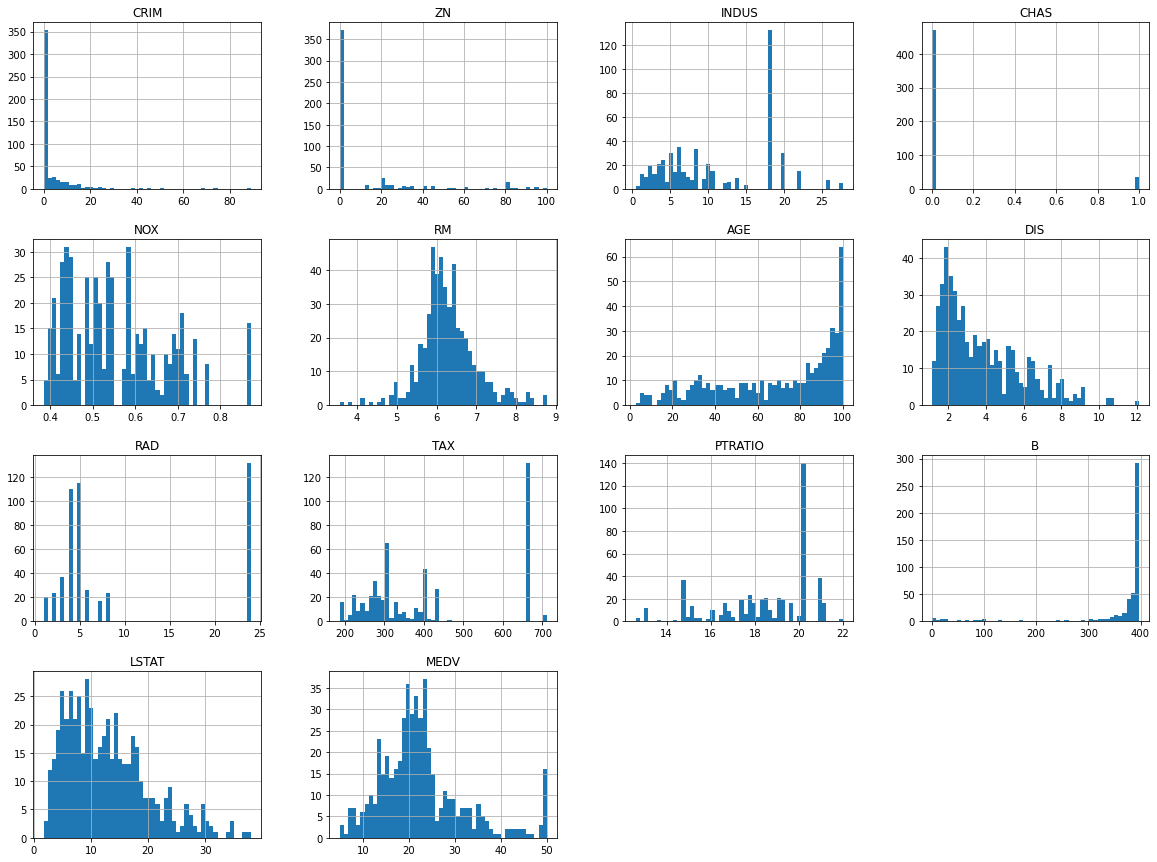

In [9]:
housing.hist(bins=50 , figsize =(20,15))

## Train - Test Splitting

In [10]:
# for learning purpose only 
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int (len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set  , test_set = split_train_test(housing , 0.2)

In [12]:
print(f"Rows in train set:{len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train set:404
 Rows in test set: 101



## By using sklean train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state= 42)
print(f"Rows in train set:{len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train set:404
 Rows in test set: 101



In [15]:
# this is was beacause of CHAS , rememeber alien example 

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2 , random_state=42)
for train_index , test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
#94/7

In [19]:
#376/28

In [20]:
housing = strat_train_set.copy()

## looking for Correlations

In [21]:
corr_matrix = housing.corr() # means IF RM IS INCREASING THEN MEDV WILL ALSO INCREASING 
                            # NEGATIVE INDICATES THAT HIGH CORRELATION DIFFER AMONG THEM IF ONE THING INCREASE OTHER THING DECREASE

In [22]:
corr_matrix['MEDV'].sort_values(ascending =False)

MEDV       1.000000
RM         0.659083
B          0.344836
ZN         0.328984
DIS        0.230729
CHAS       0.214666
RAD       -0.363537
AGE       -0.377514
CRIM      -0.398247
NOX       -0.422191
TAX       -0.442352
INDUS     -0.446903
PTRATIO   -0.486571
LSTAT     -0.738853
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

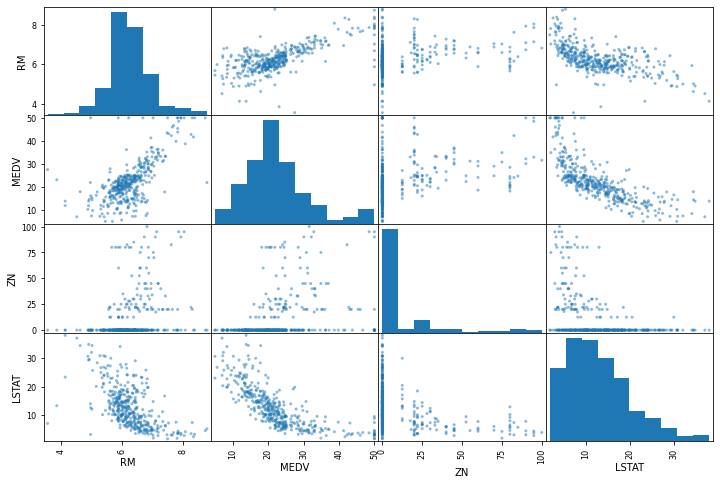

In [23]:
from pandas.plotting import scatter_matrix
attributes = ['RM','MEDV','ZN','LSTAT'] #Choosing only some for correlation
scatter_matrix(housing[attributes],figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

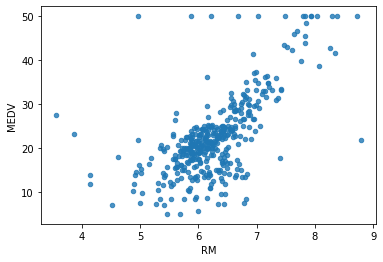

In [24]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Trying out Attribute combinations

In [25]:
housing["TAXRM"] = housing["TAX"]/housing['RM']

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [27]:
corr_matrix = housing.corr() 
corr_matrix['MEDV'].sort_values(ascending =False)

MEDV       1.000000
RM         0.659083
B          0.344836
ZN         0.328984
DIS        0.230729
CHAS       0.214666
RAD       -0.363537
AGE       -0.377514
CRIM      -0.398247
NOX       -0.422191
TAX       -0.442352
INDUS     -0.446903
PTRATIO   -0.486571
TAXRM     -0.513824
LSTAT     -0.738853
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

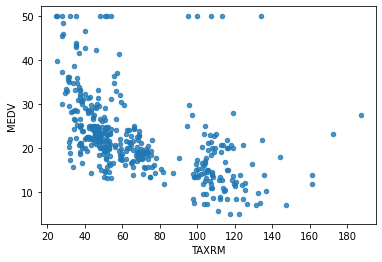

In [28]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [29]:
housing = strat_train_set.drop("MEDV",axis =1)
housing_labels = strat_train_set['MEDV'].copy()

## missing attributes


In [30]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [31]:
a= housing.dropna(subset=['RM']) #option 1
a.shape

(399, 13)

In [32]:
housing.drop('RM',axis = 1).shape #option 2 
# note that there is no column of RM and also not that the original housing dataframe will remain unchanged

(404, 12)

In [33]:
median  = housing['RM'].median() # compute median for option 3

In [34]:
median

6.185

In [35]:
housing['RM'].fillna(median) # option 3
# note that original housing dataframe will remain unchanged

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housing.shape

(404, 13)

In [37]:
housing.describe() #before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680668,10.233911,11.306287,0.069307,0.557472,6.258807,68.551980,3.773667,9.698020,411.611386,18.494307,353.518193,12.825693
std,8.249734,21.928354,6.817270,0.254290,0.116402,0.691236,28.408671,2.122964,8.758854,168.070926,2.123400,95.109115,7.204179
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.876500,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.320000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.150000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.611000,94.600000,5.100400,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1850e+00, 7.7150e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [40]:
imputer.statistics_.shape

(13,)

In [41]:
x = imputer.transform(housing)

In [42]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680668,10.233911,11.306287,0.069307,0.557472,6.257894,68.551980,3.773667,9.698020,411.611386,18.494307,353.518193,12.825693
std,8.249734,21.928354,6.817270,0.254290,0.116402,0.686983,28.408671,2.122964,8.758854,168.070926,2.123400,95.109115,7.204179
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.877750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.320000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.150000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.604500,94.600000,5.100400,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-learn Design

In [44]:
# Primarily, three types of objects

# Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

# Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

# Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## feature scaling

In [45]:
# Primarily, two types of feature scaling methods:

# 1. Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

# 2. Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this

## creating a pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [47]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [48]:
housing_num_tr

array([[-0.44240311,  3.18549186, -1.12593358, ..., -0.98752193,
         0.43858535, -0.4969514 ],
       [-0.44319077,  1.35910778, -1.47694852, ...,  0.56851664,
         0.38247497, -0.96392568],
       [ 1.37662574, -0.4672763 ,  0.9977802 , ...,  0.80428006,
        -0.04251117,  1.67948231],
       ...,
       [-0.43838345, -0.4672763 , -1.23608471, ..., -0.23307898,
         0.45669226, -0.92223155],
       [ 0.11992958, -0.4672763 ,  0.9977802 , ...,  0.80428006,
        -3.61125782,  0.85949771],
       [-0.44117488, -0.4672763 ,  0.37946519, ..., -0.98752193,
         0.41353043,  0.09510528]])

In [49]:
housing_num_tr.shape

(404, 13)

## selecting a desired model for Dragon Real Estates

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [51]:
some_data = housing.iloc[:5]

In [52]:
some_labels = housing_labels.iloc[:5]

In [53]:
prepared_data = my_pipeline.transform(some_data)

In [54]:
model.predict(prepared_data)

array([20.612, 27.052, 12.361, 20.974, 22.115])

In [55]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

## evaluating the model

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [58]:
#mse ##overfitting of model occur on Decison tree 

In [59]:
#rmse ## overfitting of model occur on decision tree

In [60]:
mse # error occured on random forest

1.3533600643564379

In [61]:
rmse # error occured on random forest

1.1633400467431858

  ## using better evalution technique - cross validation

In [62]:
# 1 2 3 4 5 6 7 8 9 
# In cross validation what we are going is that we divide our training set into small groups i.e(from 1 to 10)
# Then we trained our model on the groups except 1 and test on the 1 group and then 
# same leave the 2nd group and trained on all other groups and then test on the 2nd group similarly on the others

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr , housing_labels ,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [64]:
rmse_scores

array([3.33535992, 2.59402634, 5.0332691 , 2.71414575, 2.61195162,
       2.51749398, 2.78814002, 2.97289803, 2.04388294, 4.25128882])

In [65]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [66]:
print_scores(rmse_scores)

Scores: [3.33535992 2.59402634 5.0332691  2.71414575 2.61195162 2.51749398
 2.78814002 2.97289803 2.04388294 4.25128882]
Mean:  3.0862456513619847
Standard deviation:  0.8560192744855112


## saving the model


In [67]:
from joblib import dump , load
dump(model,'Dragon.joblib')


['Dragon.joblib']

## testing the model on the test data

In [73]:
X_test = strat_test_set.drop("MEDV",axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse  = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[22.874 22.682 46.438 33.014 45.602 34.475 21.072 23.667 32.868 20.114
 19.442 30.966 21.946 33.332 20.366 21.687 12.431 21.178 27.765 19.607
 19.824 45.357 12.154 18.959 25.968 34.549 16.533 15.526  6.597 20.368
 23.558 23.075 17.776 15.053 20.91  18.982 22.841 17.523 44.339 17.274
 21.166 18.925 19.725 18.404 33.075  8.315 24.823 14.376 21.083 21.279
 46.401 23.852 14.895 21.442 19.674 46.294 33.717 19.738 34.564 10.45
 24.014 35.847 33.435 23.857 14.194 21.073 20.687 15.764 27.995 24.891
 23.538 31.825 19.294 31.885 11.031 20.067 42.497 19.475 19.614 14.317
 41.4    9.037 22.941 23.089 28.766 15.969 23.101 22.151 20.561 15.566
 26.584  9.907 32.37  12.56  25.522 20.272 33.499 13.655 21.062 21.156
 20.714] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1, 

In [72]:
final_rmse

3.395696044077322

In [75]:
prepared_data[0]

array([-0.44240311,  3.18549186, -1.12593358, -0.27288841, -1.42332436,
       -0.55658851, -1.74289383,  2.56876126, -0.99428592, -0.57553784,
       -0.98752193,  0.43858535, -0.4969514 ])

## using the model

In [76]:
from joblib import dump , load
import numpy as np
model = load("Dragon.joblib")
input = np.array([[-0.44240311,  3.18549186, -1.12593358, -0.27288841, -1.42332436,
       -0.55658851, -1.74289383,  2.56876126, -0.99428592, -0.57553784,
       -0.98752193,  0.43858535, -0.4969514]])
model.predict(input)

array([20.612])